## Estimator of main statistical moments
 
#### Mean

The expected value operator $\operatorname{E}[.]$ of a RV $X$

\begin{align}
\operatorname{E}[X + c] &= \operatorname{E}[X] + c \\ 
\operatorname{E}[X + Y] &= \operatorname{E}[X] + \operatorname{E}[Y] \\ 
\operatorname{E}[aX] &= a \operatorname{E}[X] 
\end{align}

The estimator
$$
\bar{x} = \frac{1}{n} \sum_i x_i
$$
is itself a RV with properties:
- $E[\bar{x}] = \bar{x}$
- $Var[\bar{x}] = Var[X]/n$.

#### Variance

\begin{align}
\operatorname{Var}[X] &= \operatorname{E}[(X + -\operatorname{E}[X])^2] &=  \operatorname{E}[X^2] + (\operatorname{E}[X])^2
\end{align}

The estimator is $s^2 = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2$


#### Covariance
\begin{align}
\operatorname{Cov}[X, Y] &= \operatorname{E}[(X -\operatorname{E}[X])(Y -\operatorname{E}[Y])] &=  \operatorname{E}[XY] + \operatorname{E}[X](\operatorname{E}[X]
\end{align}

#### Standard Error (SE) 
The SE of the estimator (standard deviation of the sampling distribution of a statistic is 
$$
\operatorname{SE}[X] = \operatorname{Std}[X]\sqrt(n)).
$$

For the mean we get

$SE[\bar{x}] = Std[X]/\sqrt{n}$

# Main distributions

## Normal distribution

The normal or $N$ distribution is useful because of the central limit theorem (CLT) which states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.
Parameters: $\mu$ mean (location) and $\sigma^2>0$ variance. Estimators:

## The Chi-Square distribution

The chi-square or $\chi_n^2$ distribution with $n$ degrees of freedom (df) is the distribution of a sum of the squares of $n$ independent standard normal random variables $N(0, 1)$. Let $X \sim N(\mu, \sigma^2)$ and $Z=(X - mu)/\sigma \sim N(0, 1)$, then:

- The squared standard $Z^2 \sim \chi_1^2$ (one df).

- **The distribution of sum of squares** the sum of square of $n$ normal RV: $\sum_i^n Z_i^2 \sim \chi_n^2$

The sum of two $\chi^2$ RV with $p$ and $q$ df is a $\chi^2$ RV with $p+q$ df. This is useful when summing/subtracting sum of squares.

## The Fisher's F-distribution

The F-distribution $F_{n, p}$ with $n$ and $p$ df is the ratio of two independant $\chi^2$ variables. Let $X \sim \chi_n^2$ and $Y \sim \chi_p^2$ then: 
$$
F_{n, p} = \frac{X/n}{Y/p}
$$

F-distribution plays a central role in hypothesis testing answering the question: **Are two variances equals?**

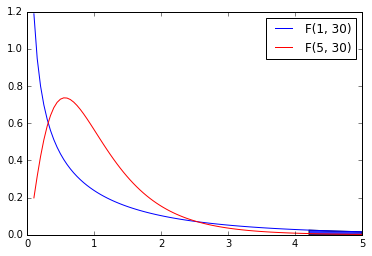

In [1]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline

fvalues = np.linspace(.1, 5, 100)

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# cdf(x, df1, df2): Cumulative distribution function of F.
# ie. 
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert  proba_at_f_inf_3 + proba_at_f_sup_3 == 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30), alpha=.8, label="P < 0.05")
plt.show()

## The  Student's t-distribution

Let normal RV $M \sim N(0, 1)$ and a $V \sim \chi_n^2$. The t-distribution $T_n$ with $n$ df is the ratio:
$$
T_n = \frac{M}{\sqrt{V/n}}
$$

The distribution of the difference between an estimated parmeter with its true value divided by the standard deviation of the estimated parameter (standard error) follow a t-distribution. **Is this parameters different from a given value ?**

# Univariate statistics and hypothesis testing

## Principles

What statistical test should I use? http://www.ats.ucla.edu/stat/mult_pkg/whatstat/


Mass univariate statistical analysis: explore association betweens pairs of variable. 

- In statistics, a **categorical variable** or a **factor** is a variable that can take on one of a limited, and usually fixed, number of possible values, thus assigning each individual to a particular group or "category. The levels are the possibles values of the variable. Number of level = 2, binomial, Number of level > 2: multinomial. There is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

- An **Ordinal variable** is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high.

- A **continuous** or **quantitative variable** $x \in R$ is one that can take any value in a range of possible values possibly infinite.  Eg.: Salary, Experience in years.

- **An independent variable (IV)** is exactly what it sounds like. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age. In fact, when you are looking for some kind of relationship between variables you are trying to see if the independent variable causes some kind of change in the other variables, or dependent variables.

- A **dependent variable** is exactly what it sounds like. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does.

##  One sample t-test (no IV)

The one-sample t-test is used to determine whether a sample comes from a population with a specific mean. For example you want to test if the average height of a population is 1.75m.

### 1. Build a model assume that height is normally distributed: $X \sim N(\mu, \sigma)$.

### 2. Estimate the model parameters 
$\bar{x}, s$ are the estimators of $\mu, \sigma$

### 3. Test
In testing the null hypothesis that the population mean is equal to a specified value $\mu_0=1.75$, one uses the statistic:
$$
    t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} 
$$
Although the parent population does not need to be normally distributed, the distribution of the population of sample means, $\overline{x}$, is assumed to be normal. By the central limit theorem, if the sampling of the parent population is independent then the sample means will be approximately normal.

### Exercise

- Given the following samples, test whether its true mean is 1.75.
Warning, when computing the std or the variance set ddof=1. The default
value 0, leads to the biased estimator of the variance.


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(seed=42)  # make example reproducible
n = 100
x = np.random.normal(loc=1.78, scale=.1, size=n)

- Compute the t-value (tval)

- Plot the T(n-1) distribution for 100 tvalues values within [0, 10]. Draw P(T(n-1)>tval) 
  ie. color the surface defined by x values larger than tval below the T(n-1).
  Using the code.

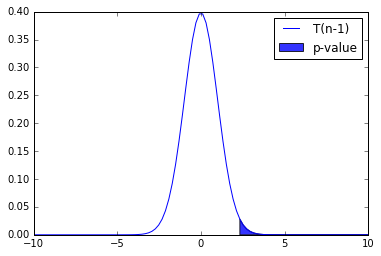

In [3]:
tval = 2.1598800019529265 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tval]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")
plt.legend()

- Compute the p-value: P(T(n-1)>tval).

- The p-value is one-sided: a two-sided test would test P(T(n-1) > tval) and P(T(n-1) < -tval). What would be the two sided p-value ?
  
- Compare the two-sided p-value with the one obtained by stats.ttest_1samp
using assert np.allclose(arr1, arr2)

###  Two sample t-test  (IV categorial with nb level = 2)

http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm

###  Anova F-test  (IV categorial with nb level > 2)


## Simple linear regression (one continuous independant variable (IV))

Using the dataset "salary", explore the association between the dependant variable (eg. Salary) and the independant (eg.: Experience is quantitative)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'ftp://ftp.cea.fr/pub/unati/people/educhesnay/pylearn_doc/data/salary_table.csv'
salary = pd.read_csv(url)
salary.E = salary.E.map({1:'Bachelor', 2:'Master', 3:'Ph.D'})
salary.M = salary.M.map({0:'N', 1:'Y'})

## Outcome
## S: salaries for IT staff in a corporation.

## Predictors:
## X: experience (years)
## E: education (1=Bachelor's, 2=Master's, 3=Ph.D)
## M: management (1=management, 0=not management)

### 1. Model the data on some **hypothesis** eg.: Salary is a linear function of the Experience.

$$
\text{salary}_i = \beta~\text{experience}_i + \beta_0 + \epsilon_i
$$
More generally:
$$
y_i = \beta~x_i + \beta_0 + \epsilon_i
$$

- $\beta$: the slope or coeficient or parameter of the model

- $\beta_0$: the **intercept** or bias is the second parameter of the model

- $\epsilon_i$: is the ith error, or residual with $\epsilon \sim N(0, \sigma^2)$


### 2. **Fit** the model to your data. Estimate $\beta$, $\beta_0$ and $\sigma^2$

Minimizes the **mean squared error (MSE)**, or **Ordinary Least Squares (OLS)** Find $\beta, \beta_0$ that minimizes $F = \sum_i \epsilon_i^2$
$$
\sum_i(y_i - \beta~x_i - \beta_0)^2
$$

$$
\frac{\partial F}{\beta_0} = \sum_i(y_i - \beta~x_i - \beta_0) = 0\\
\sum_i y_i = \beta~\sum_i x_i + n~\beta_0\\
n~\bar{y} = n~\beta~\bar{x} + n~\beta_0\\
\beta_0 = \bar{y} - \beta~\bar{x}\\
$$
$$
\frac{\partial F}{\beta} = \sum_i x_i(y_i - \beta~x_i - \beta_0) = 0
$$

Plug $\beta_0$

$$
\sum_i x_i(y_i - \beta~x_i - \bar{y} + \beta \bar{x}) = 0\\
\sum_i x_i y_i - \bar{y}\sum_i x_i = \beta \sum_i(x_i - \bar{x})
$$

Divide by $n$ both sides

$$
1/n \sum_i x_i y_i  - \bar{y}\bar{x} = 1 / n~\beta  \sum_i(x_i - \bar{x})\\
\beta = \frac{Cov(x, y)}{Var(x)}
$$

y=491.486913 x + 13584.043803,  r:0.538886, r-squared:0.290398, 
p-value:0.000112, std_err:115.823381


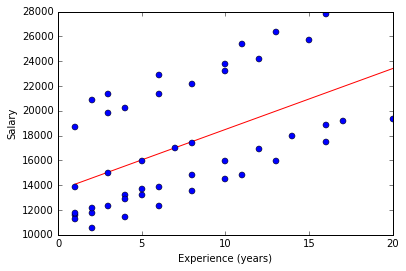

In [9]:
from scipy import stats
import numpy as np
y, x = salary.S, salary.X
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print("y=%f x + %f,  r:%f, r-squared:%f, \np-value:%f, std_err:%f" 
      % (beta, beta0, r_value, r_value**2, p_value, std_err))
# plotting the line
yhat = beta * x  +  beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

### 3. **Test** your model.

#### 3.1 Goodness of fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question. We will consider the **explained variance**  also known as the coefficient of determination, denoted $R^2$ pronounced **R-squared**.

The SS total ($SS_\text{tot}$) = SS explained by the regression ($SS_\text{reg}$) + SS of residuals unexplained by the regression ($SS_\text{res}$):

$$ SS_\text{tot} = SS_\text{reg} + SS_\text{res}$$
![title](images/Coefficient_of_Determination.png)

$$\bar{y} = \frac{1}{n}\sum_i y_i $$

Errors obtained with intercept only: the total sum of squares:

$$ SS_\text{tot}=\sum_i (y_i-\bar{y})^2$$


The regression sum of squares, also called the explained sum of squares. 

$$SS_\text{reg}=\sum_i (\hat{y_i} -\bar{y})^2$$
Where $\hat{y_i} = \beta x_i + \beta_0$ is the estimated value of salary $\hat{y_i}$ given a value of experience $x_i$.

The sum of squares of residuals, also called the residual sum of squares (RSS):

$$SS_\text{res}=\sum_i (y_i - \hat{y_i})^2$$ also called 

$R^2$ is the explained SS of errors $\equiv$ the variance explain by the regression / total variance

$$
R^2 = \frac{\text{Explained SS}}{\text{Total SS}}
    = \frac{SS_\text{reg}}{SS_{tot}} 
    = 1 - {SS_{res}\over SS_{tot}}.
$$

###  3.2 Test

Let $\hat{\sigma}^2 = SS_\text{res} / (n-2)$ an estimator of the variance of $\epsilon$. $2$ stem from the number of estimated parameters.

- **Unexplained variance**: $SS_\text{res}/\hat{\sigma}^2 \sim \chi_{n-2}^2$

- **Explained variance**: $SS_\text{reg}/\hat{\sigma}^2 \sim \chi_{1}^2$ since it is the difference of $SS_\text{tot}/\hat{\sigma}^2 (\sim \chi_{n-1})^2$ with $SS_\text{res}/\hat{\sigma}^2 (\sim \chi_{n-2}^2)$ ie. $(n-1) - (n-2)$ df.

The Fisher statistics of the ratio of two variances:
$$
F = \frac{\text{Explained variance}}{\text{Unexplained variance}} = \frac{SS_\text{reg} / 1}{ SS_\text{res} / (n - 2)} \sim F(1, n-2)
$$

Using the F-distribution, compute the probability of observing a value greater than F under H0 i.e.: $P(x > F|H_0)$ ie. the survival function (1 - Cumulative Distribution Function) at x of the given F-distribution.


### Exercise

Compute:

- $\bar{y}$: `y_mu`

- $SS_\text{tot}$: `ss_tot`

- $SS_\text{reg}$: `ss_reg`

- $SS_\text{res}$: `ss_res`

- Check partition of variance formula based on SS using `assert np.allclose(val1, val2, atol=1e-05)`

- What np.allclose does?

- What assert does?

- What is it worth for

- Compute $R^2$ and compare with `r_value` above

- Compute F score

- Compute the p-value:
 *  Plot the $F(1, n)$ distribution for 100 f values within [10, 25]. Draw $P(F(1, n) > F)$ ie. color the surface defined by x values larger than F below the $F(1, n)$.

 * $P(F(1, n) > F)$ is the p-value, compute it.

## Introduction to statmodels: one or more independant variables